In [1]:
# 한글화
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams['axes.unicode_minus'] = False # 한글화에서 - 부호 처리

Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

merged_data = pd.read_csv('/content/drive/MyDrive/간이프로젝트/12월4일/지역특징.xlsx - 시트8 (3).csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
merged_data.head()

,지점명,월,해면기압 평균(hPa),해면기압 표준편차(hPa),평균기온 평균(℃),평균기온 표준편차(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),강수량 표준편차(㎜),강수량 계속시간(시간),상대습도 평균(%),증기압 평균(hPa),증기압 표준편차(hPa),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종)
0,강원특별자치도,1월,1022.7,0.9,1.0,2.1,5.4,2.6,37.5,29.9,NaN,42.5,3.2,0.7,207.5,276.0,이팝나무
1,강원특별자치도,2월,1022.1,1.5,2.4,1.5,6.9,1.5,56.2,57.8,NaN,48.7,3.8,0.7,192.2,324.4,이팝나무
2,강원특별자치도,3월,1018.2,1.8,7.7,1.3,12.4,3.1,58.1,33.3,NaN,49.2,5.0,0.7,222.2,459.3,이팝나무
3,강원특별자치도,4월,1014.0,1.9,13.0,1.5,17.9,8.2,99.9,47.7,NaN,51.3,7.2,0.5,220.5,543.2,이팝나무
4,강원특별자치도,5월,1010.3,1.1,18.8,1.6,23.7,14.2,55.4,51.2,NaN,55.1,11.1,1.1,242.3,643.5,이팝나무


In [83]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# df_old 데이터프레임 정의 (이 부분은 실제 데이터에 맞게 수정해야 합니다)
# 예: df_old = pd.read_csv('data.csv')

# 지점명 열의 값을 고유한 번호로 매핑합니다.
mapping_locations = {
    "강원특별자치도": 1,
    "서울특별시": 2,
    "인천광역시": 3,
    "경기도": 4,
    "충청북도": 5,
    "충청남도": 6,
    "대전광역시": 7,
    "전라북도": 8,
    "울산광역시": 9,
    "경상남도": 10,
    "광주광역시": 11,
    "부산광역시": 12,
    "전라남도": 13,
    "제주특별자치도": 14,
    "경상북도": 15,
    "대구광역시": 16
}
merged_data["지점명"] = merged_data["지점명"].replace(mapping_locations)

mapping_species = {
    "은행나무": 1,
    "왕벚나무": 2,
    "이팝나무": 3,
    "느티나무": 4,
    "무궁화": 5
}

merged_data["가로수 선정(종)"] = merged_data["가로수 선정(종)"].replace(mapping_species)

# 월 열의 값을 고유한 번호로 매핑합니다.
mapping_months = {
    "1월": 1,
    "2월": 2,
    "3월": 3,
    "4월": 4,
    "5월": 5,
    "6월": 6,
    "7월": 7,
    "8월": 8,
    "9월": 9,
    "10월": 10,
    "11월": 11,
    "12월": 12
}
merged_data["월"] = merged_data["월"].replace(mapping_months)

from sklearn.impute import KNNImputer

# KNNImputer 인스턴스 생성
imputer = KNNImputer(n_neighbors=3)

# 결측치를 포함한 데이터프레임에 imputer 적용
df_filled = imputer.fit_transform(merged_data)

# 변환된 데이터를 데이터프레임으로 변환
df_filled = pd.DataFrame(df_filled, columns=merged_data.columns)


In [84]:
merged_data = df_filled.rename(columns={'지점명': '지역'})

In [90]:
merged_data

,지역,평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종),계절
0,1.0,1.0,5.4,2.6,37.5,42.5,207.5,276.0,3.0,겨울
1,1.0,2.4,6.9,1.5,56.2,48.7,192.2,324.4,3.0,겨울
2,1.0,7.7,12.4,3.1,58.1,49.2,222.2,459.3,3.0,봄
3,1.0,13.0,17.9,8.2,99.9,51.3,220.5,543.2,3.0,봄
4,1.0,18.8,23.7,14.2,55.4,55.1,242.3,643.5,3.0,봄
...,...,...,...,...,...,...,...,...,...,...
187,16.0,27.5,32.3,23.7,249.1,73.3,165.1,473.9,4.0,여름
188,16.0,22.2,27.1,18.2,147.4,66.7,190.8,456.4,4.0,가을
189,16.0,16.4,21.9,11.7,88.8,61.0,229.1,416.2,4.0,가을
190,16.0,9.9,15.0,5.5,32.8,57.1,190.0,299.2,4.0,가을


In [86]:
# 제거할 컬럼 리스트
columns_to_remove = ['해면기압 평균(hPa)', '해면기압 표준편차(hPa)', '평균기온 표준편차(℃)', '강수량 표준편차(㎜)', '강수량 계속시간(시간)', '증기압 평균(hPa)', '증기압 표준편차(hPa)']

# 해당 컬럼들을 제거하고 결과를 merged_data에 다시 할당
merged_data = merged_data.drop(columns=columns_to_remove)

# 변경된 데이터 프레임 출력
merged_data

,지역,월,평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종)
0,1.0,1.0,1.0,5.4,2.6,37.5,42.5,207.5,276.0,3.0
1,1.0,2.0,2.4,6.9,1.5,56.2,48.7,192.2,324.4,3.0
2,1.0,3.0,7.7,12.4,3.1,58.1,49.2,222.2,459.3,3.0
3,1.0,4.0,13.0,17.9,8.2,99.9,51.3,220.5,543.2,3.0
4,1.0,5.0,18.8,23.7,14.2,55.4,55.1,242.3,643.5,3.0
...,...,...,...,...,...,...,...,...,...,...
187,16.0,8.0,27.5,32.3,23.7,249.1,73.3,165.1,473.9,4.0
188,16.0,9.0,22.2,27.1,18.2,147.4,66.7,190.8,456.4,4.0
189,16.0,10.0,16.4,21.9,11.7,88.8,61.0,229.1,416.2,4.0
190,16.0,11.0,9.9,15.0,5.5,32.8,57.1,190.0,299.2,4.0


In [88]:
from sklearn.pipeline import Pipeline
# 월을 계절로 매핑하는 함수 정의
def map_month_to_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 계절 열 추가
merged_data['계절'] = merged_data['월'].apply(map_month_to_season)

# 기존 '월' 열 제거
merged_data.drop('월', axis=1, inplace=True)

merged_data.to_csv('병합된데이터.csv', index=False)

In [89]:
print(merged_data)

       지역  평균기온 평균(℃)  최고기온 평균(℃)  최저기온 평균(℃)  강수량 합계(㎜)  상대습도 평균(%)  \
0     1.0         1.0         5.4         2.6       37.5        42.5   
1     1.0         2.4         6.9         1.5       56.2        48.7   
2     1.0         7.7        12.4         3.1       58.1        49.2   
3     1.0        13.0        17.9         8.2       99.9        51.3   
4     1.0        18.8        23.7        14.2       55.4        55.1   
..    ...         ...         ...         ...        ...         ...   
187  16.0        27.5        32.3        23.7      249.1        73.3   
188  16.0        22.2        27.1        18.2      147.4        66.7   
189  16.0        16.4        21.9        11.7       88.8        61.0   
190  16.0         9.9        15.0         5.5       32.8        57.1   
191  16.0         2.6         7.2         1.4       21.2        49.6   

     일조시간 합계(시간)  수평면일사량 합계(MJ/㎡)  가로수 선정(종)  계절  
0          207.5            276.0        3.0  겨울  
1          192.2            324.4

In [75]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# # 특성과 타겟 나누기
# X = merged_data.drop(columns=['가로수 선정(종)'])  # 타겟 열을 제외한 모든 열을 특성으로 사용
# y = merged_data['가로수 선정(종)']  # 타겟 (나무의 종류)

# # 학습용과 테스트용 데이터로 나누기
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # ColumnTransformer를 사용하여 특성별로 변환을 적용 (원-핫 인코딩 및 정규화)
# numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)','상대습도 평균(%)','일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']
# categorical_features = ['계절', '지역']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),  # 연속형 특성들을 정규화
#         ('cat', OneHotEncoder(), categorical_features)  # 범주형 특성들을 원-핫 인코딩
#     ])

# # 모델 훈련 파이프라인 정의
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', RandomForestClassifier(random_state=42))
# ])

# # 파이프라인을 사용하여 모델 훈련
# pipeline.fit(X_train, y_train)

# # 모델 예측
# y_pred = pipeline.predict(X_test)

# # 모델 평가
# accuracy = accuracy_score(y_pred, y_test)
# print(f"Accuracy: {accuracy}")

Accuracy: 0.9655172413793104


In [74]:
y_train

12     1.0
41     2.0
159    2.0
189    4.0
184    4.0
      ... 
106    3.0
14     1.0
92     2.0
179    4.0
102    3.0
Name: 가로수 선정(종), Length: 134, dtype: float64

In [73]:
X_train

,지역,평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),계절
12,2.0,2.3,1.9,6.0,14.7,52.2,193.9,243.100000,겨울
41,4.0,22.8,28.4,18.2,99.2,71.4,225.5,565.900000,여름
159,14.0,14.6,18.4,11.3,92.5,65.8,202.9,538.200000,봄
189,16.0,16.4,21.9,11.7,88.8,61.0,229.1,416.200000,가을
184,16.0,20.5,26.7,14.9,59.3,51.2,259.8,672.600000,봄
...,...,...,...,...,...,...,...,...,...
106,9.0,10.8,15.9,6.3,51.6,62.5,184.8,303.666667,가을
14,2.0,6.4,11.8,2.0,24.7,51.4,235.9,442.500000,봄
92,8.0,21.2,26.0,17.5,131.1,81.8,197.1,516.366667,가을
179,15.0,1.9,7.7,3.2,24.4,56.3,186.2,248.400000,겨울


In [66]:
# 튜닝전 정확도 및 점수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 0.9655172413793104
Precision: 0.9681697612732095
Recall: 0.9655172413793104
F1-Score: 0.9604597701149425


In [67]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 탐색할 하이퍼파라미터 조합 설정
param_dist = {
    'model__n_estimators': np.arange(100, 500, 100),
    'model__max_depth': [None] + list(np.arange(10, 50, 20)),
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']  # 'auto' 옵션 제거
}

# Randomized Search 객체 생성
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=25, cv=5, scoring='accuracy', random_state=42, verbose=0)

# 훈련 데이터에 Randomized Search 수행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합 출력
print("Best Parameters: ", random_search.best_params_)

# 최적의 모델 사용
best_model = random_search.best_estimator_

# 테스트 데이터로 최적의 모델 평가
y_pred1 = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

Best Parameters:  {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': None}
Accuracy: 1.0


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_test, y_pred1, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_test, y_pred1, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


<ipython-input-29-6c319c92b822>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


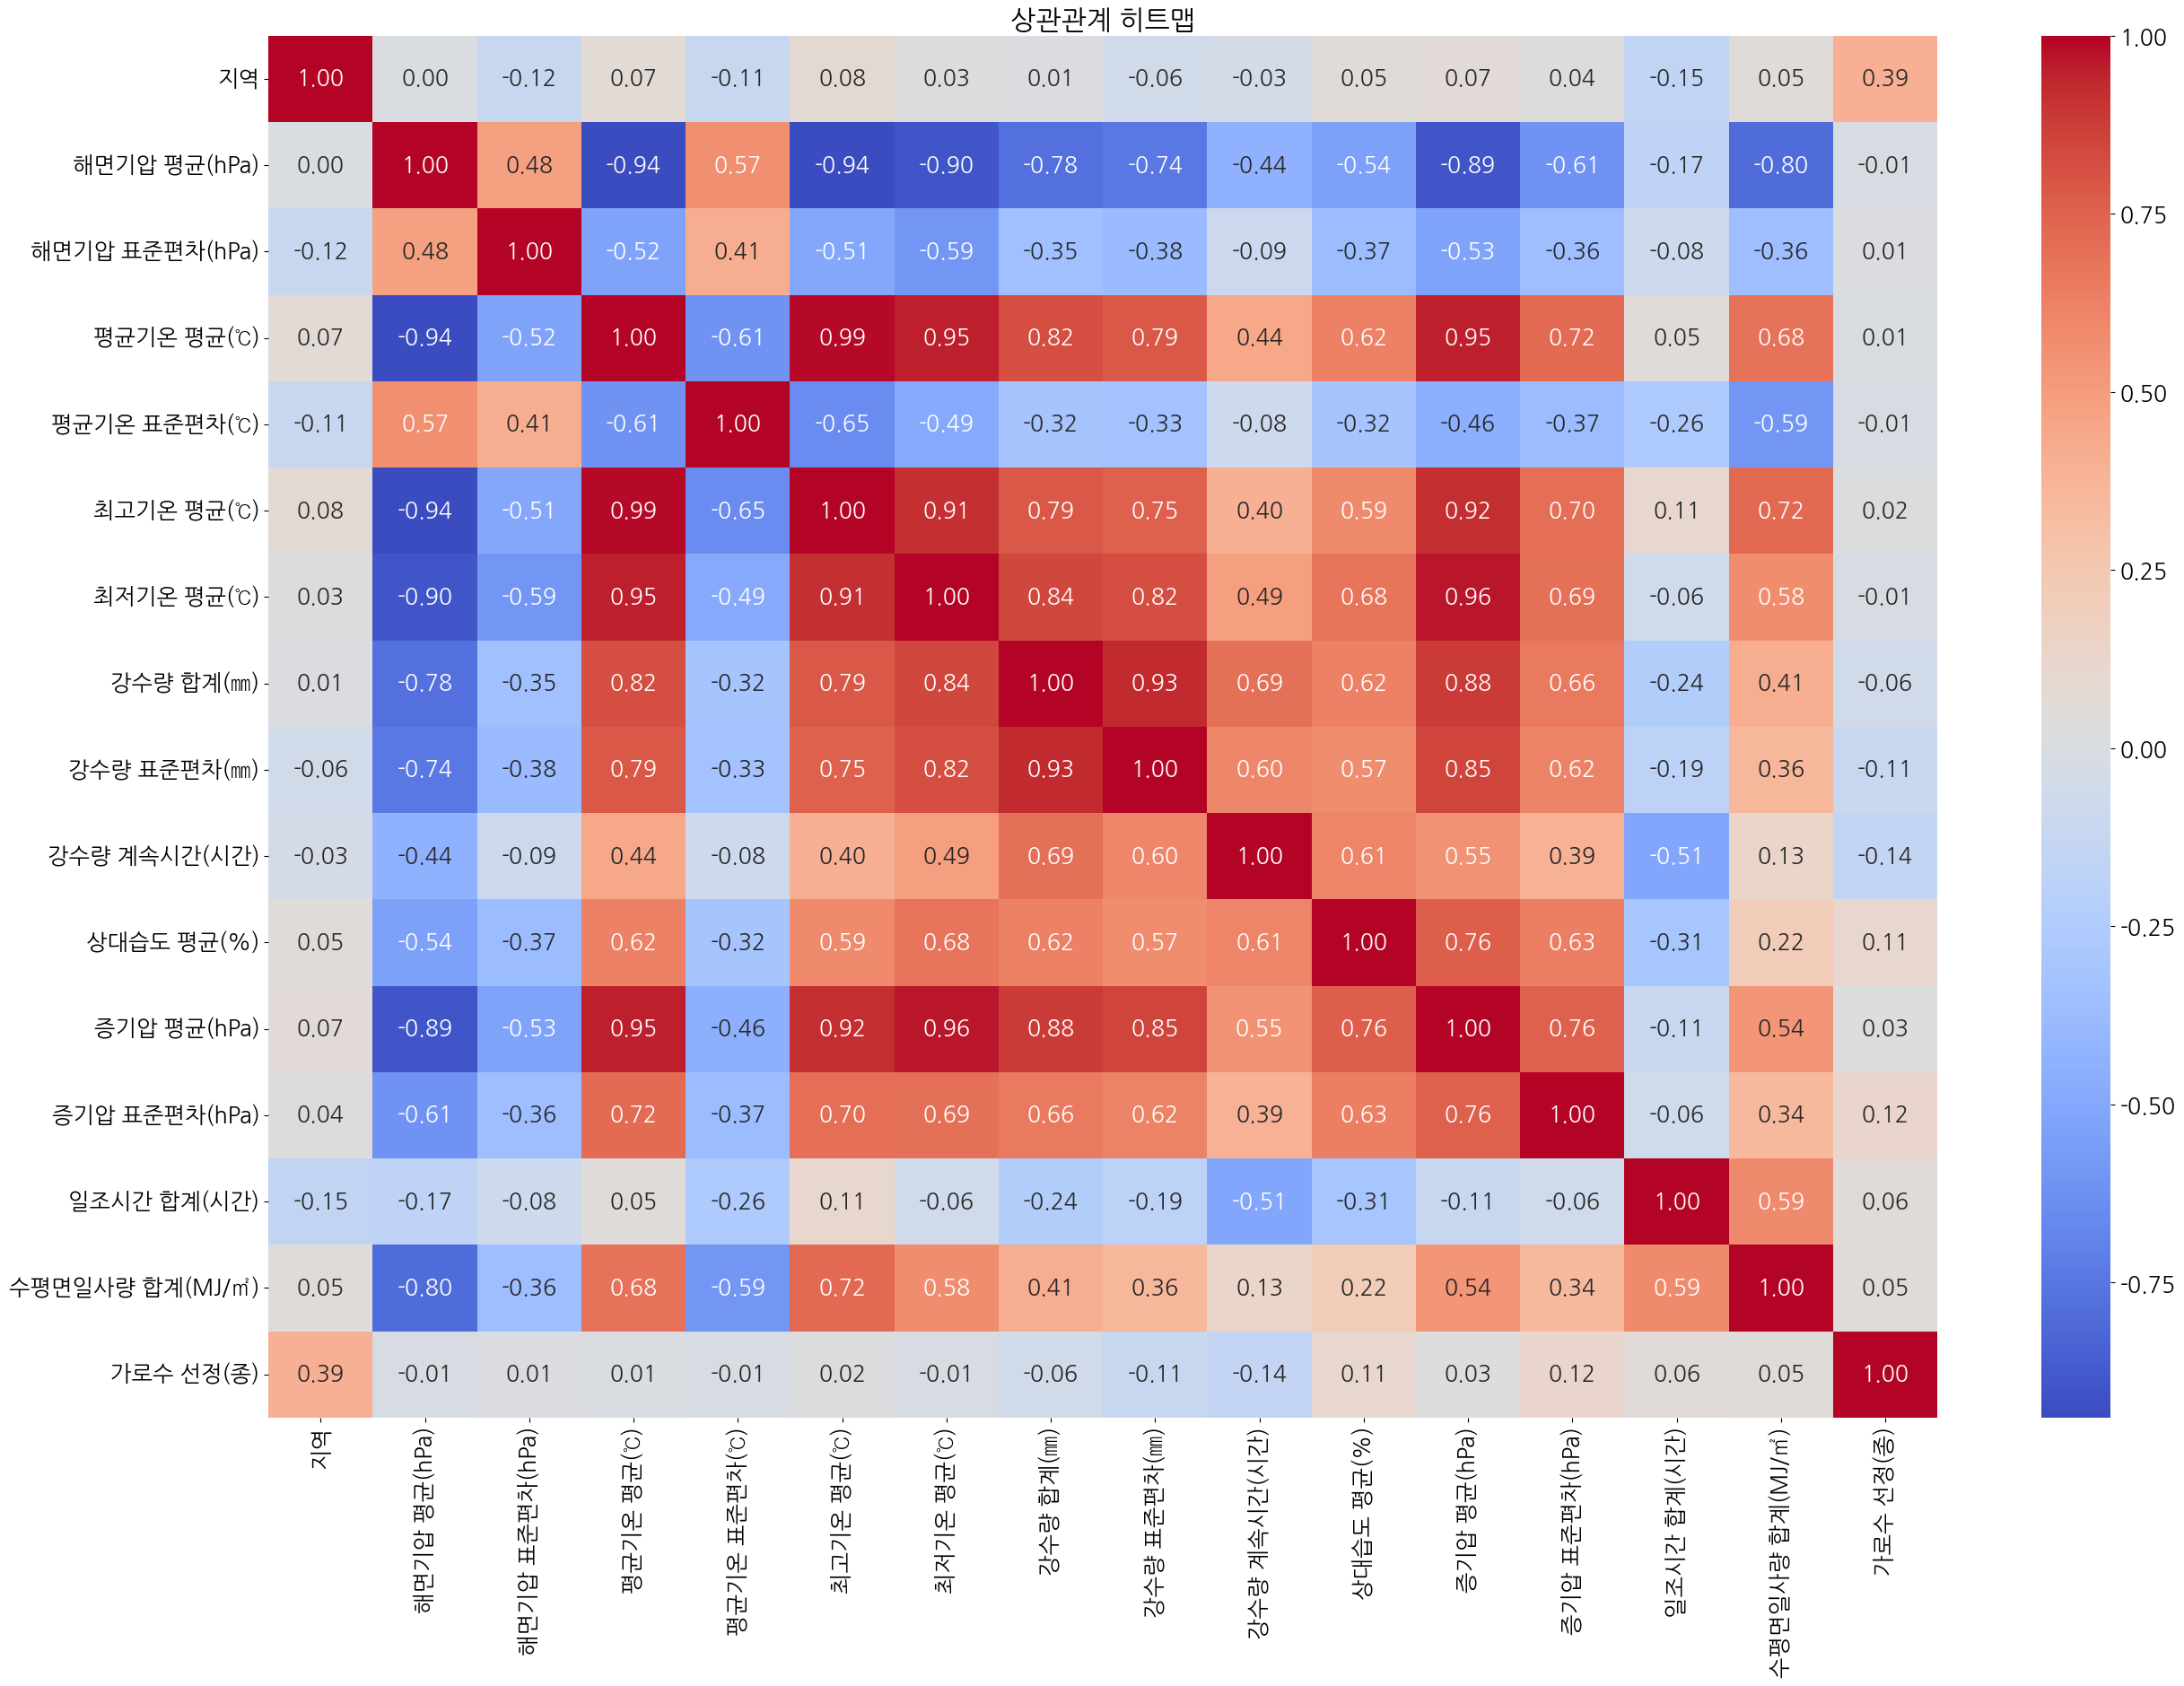

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에서 상관관계 행렬 계산
correlation_matrix = merged_data.corr()

# 히트맵 그리기
plt.figure(figsize=(30, 20))  # 그림 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

In [17]:
import pandas as pd

# CSV 파일 읽기 (여기서는 예시 파일 경로를 사용합니다. 실제 파일 경로를 사용하세요)
# merged_data = pd.read_csv('/path/to/your/file.csv')

# 유지하려는 열 목록
columns_to_keep = ['가로수 선정(종)','평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)', '계절', '지역']

# 선택한 열만 포함하는 새로운 데이터프레임 생성
selected_data = merged_data[columns_to_keep]

# 필요하다면 새로운 데이터프레임을 파일로 저장
selected_data.to_csv('selected_data.csv', index=False)


<ipython-input-117-7c4fec7570e3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


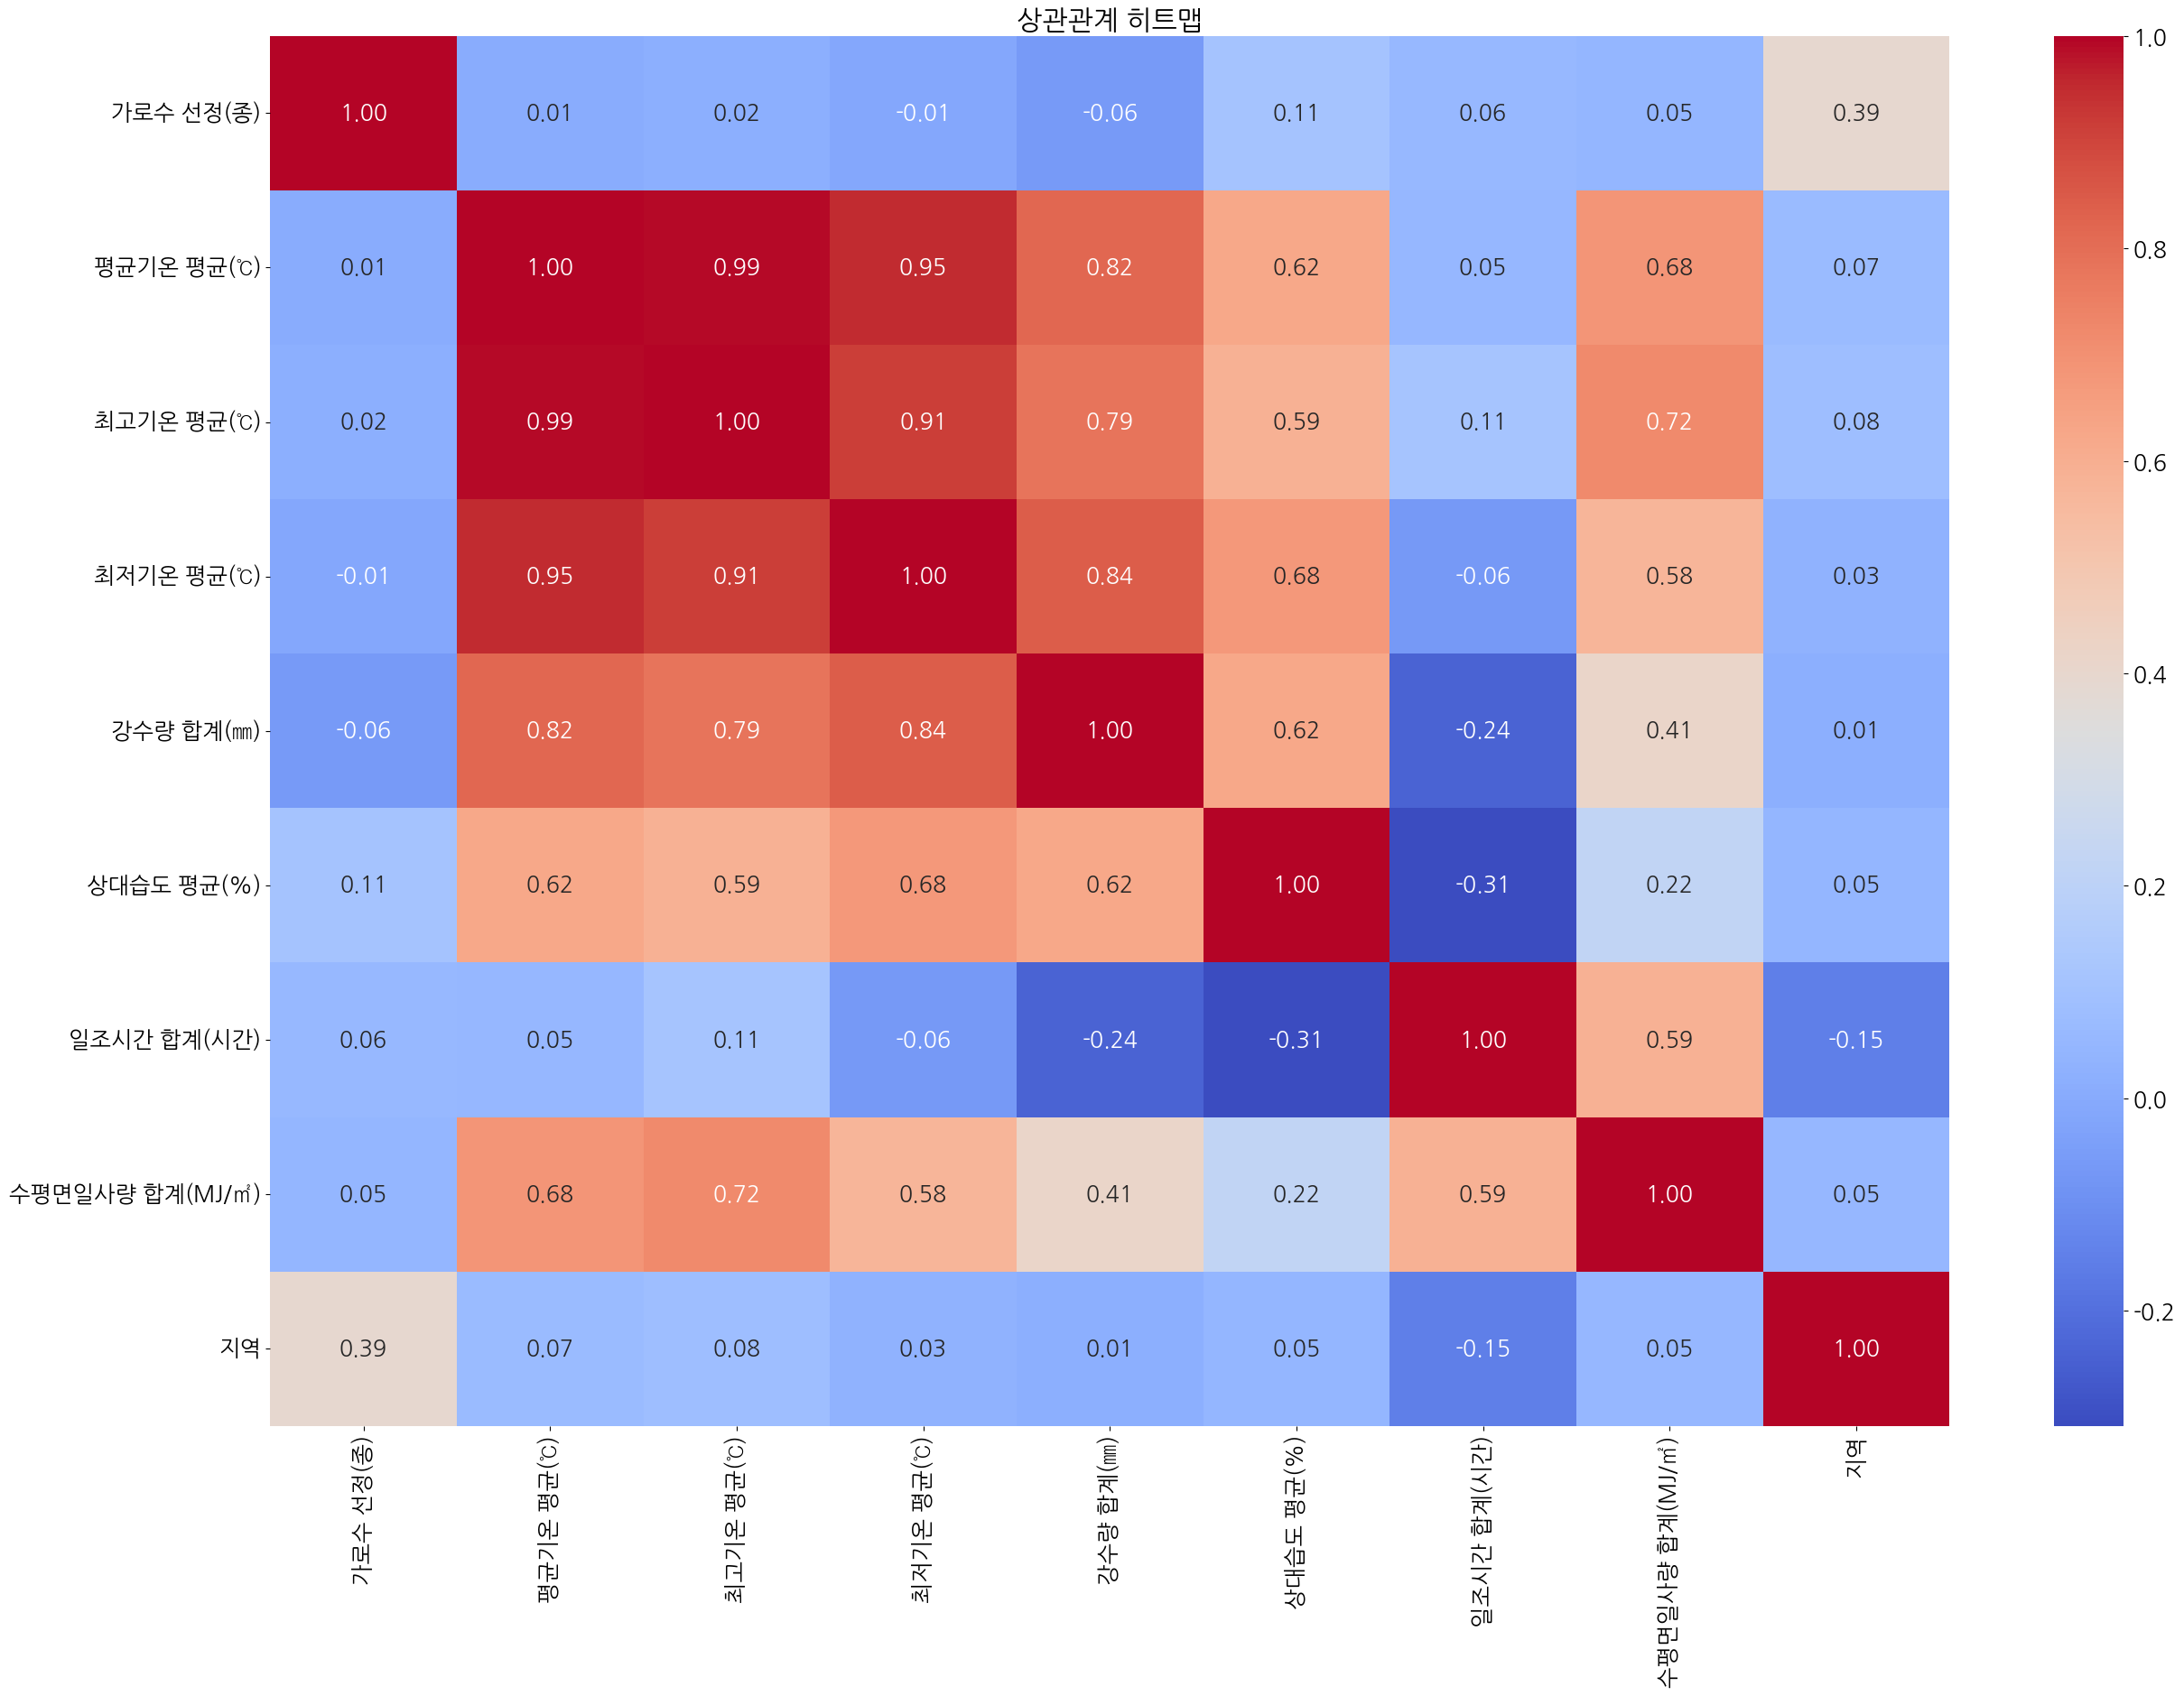

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에서 상관관계 행렬 계산
correlation_matrix = selected_data.corr()

# 히트맵 그리기
plt.figure(figsize=(30, 20))  # 그림 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

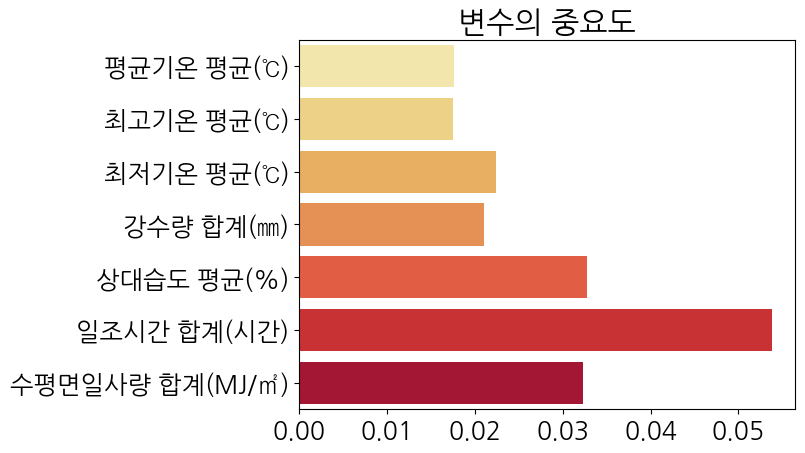

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
importances = best_model.named_steps['model'].feature_importances_

# OneHotEncoder로 생성된 특성 이름 가져오기
ohe_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# 숫자형 특성 중요도
numeric_feature_importances = importances[:len(numeric_features)]

# OneHotEncoder 특성 중요도 (길이 조정)
ohe_feature_importances = importances[len(numeric_features):len(numeric_features) + len(ohe_feature_names)]

# '지역'과 '계절'과 관련된 특성 이름 제외
excluded_ohe_features = [('지역_' in name or '계절_' in name) for name in ohe_feature_names]
ohe_feature_importances = ohe_feature_importances[~np.array(excluded_ohe_features)]
ohe_feature_names = ohe_feature_names[~np.array(excluded_ohe_features)]

# 모든 특성 이름과 중요도를 결합 (지역 및 계절 제외)
all_feature_names = numeric_features + list(ohe_feature_names)
all_importances = np.concatenate([numeric_feature_importances, ohe_feature_importances])

# 특성 중요도 시각화
sns.barplot(x=all_importances, y=all_feature_names, palette="YlOrRd")
plt.title('변수의 중요도')
plt.show()



In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 예시 나무 종류 라벨 (실제 데이터에 맞게 조정)
# tree_species = {1: "은행나무", 2: "왕벚나무", 3: "이팝나무", 4: "느티나무", 5: "무궁화"}

# # 각 나무 종류별로 그래프 그리기
# plt.figure(figsize=(12, 8))
# for label, species in tree_species.items():
#     if len(y_test[y_test == label]) > 1 and len(y_pred[y_pred == label]) > 1:
#         sns.kdeplot(y_test[y_test == label], label=f'실제 값 - {species}', fill=True)
#         sns.kdeplot(y_pred[y_pred == label], label=f'예측 값 - {species}', linestyle="--")

# plt.title('예측 값과 실제 값의 분포 (나무 종류별)')
# plt.legend()
# plt.show()


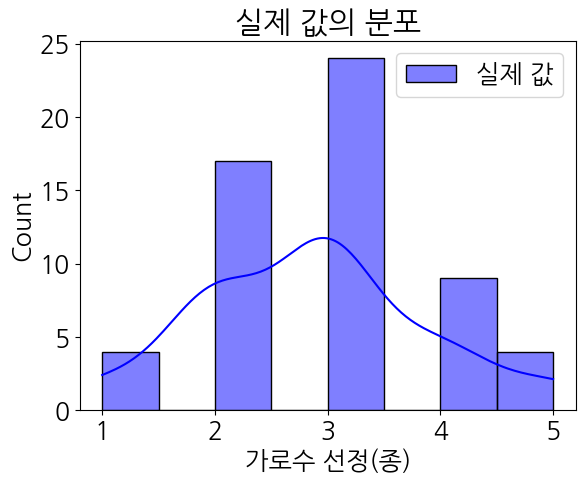

In [ ]:
sns.histplot(y_test, color="blue", label="실제 값", kde=True)
plt.title('실제 값의 분포')
plt.legend()
plt.show()


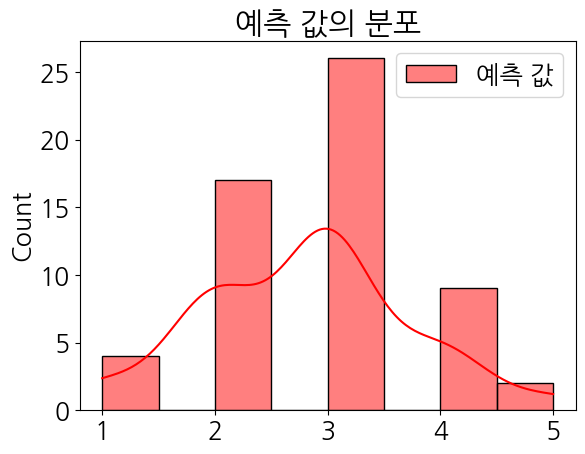

In [ ]:
sns.histplot(y_pred, color="red", label="예측 값", kde=True)
plt.title('예측 값의 분포')
plt.legend()
plt.show()

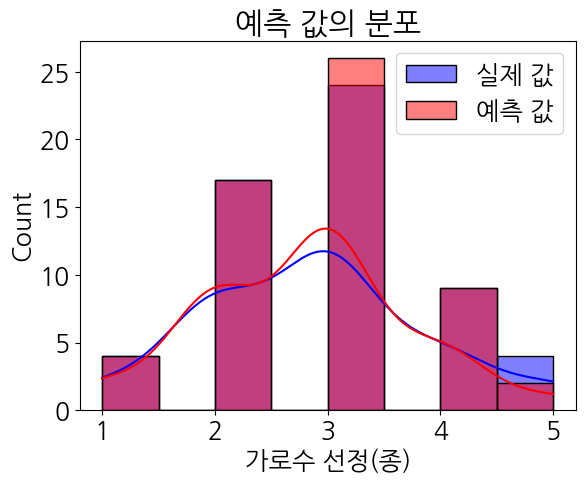

In [ ]:
sns.histplot(y_test, color="blue", label="실제 값", kde=True)
sns.histplot(y_pred, color="red", label="예측 값", kde=True)
plt.title('예측 값의 분포')
plt.legend()
plt.show()

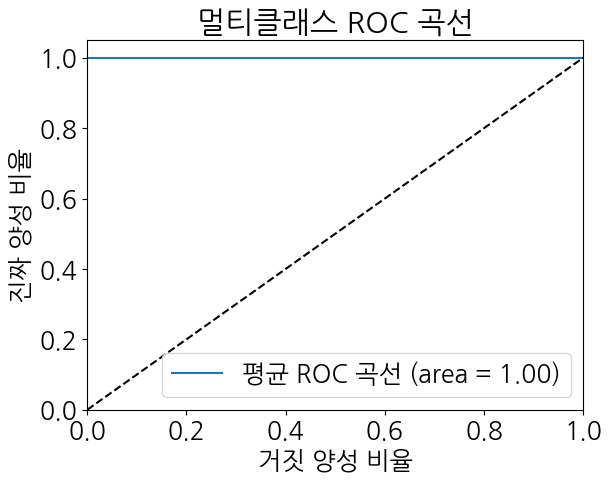

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# 클래스 라벨을 이진 형식으로 변환 (예: [1, 2, 3] -> [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# 예측 확률 계산
y_pred_prob = best_model.predict_proba(X_test)

# 각 클래스에 대해 ROC 곡선과 AUC 계산
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 모든 클래스에 대한 평균 AUC 계산
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

mean_auc = auc(all_fpr, mean_tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(all_fpr, mean_tpr, label='평균 ROC 곡선 (area = {0:0.2f})'.format(mean_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('거짓 양성 비율')
plt.ylabel('진짜 양성 비율')
plt.title('멀티클래스 ROC 곡선')
plt.legend(loc="lower right")
plt.show()


In [ ]:
selected_data

,가로수 선정(종),평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),계절,지역
0,3.0,1.0,5.4,2.6,37.5,42.5,207.5,276.0,겨울,1.0
1,3.0,2.4,6.9,1.5,56.2,48.7,192.2,324.4,겨울,1.0
2,3.0,7.7,12.4,3.1,58.1,49.2,222.2,459.3,봄,1.0
3,3.0,13.0,17.9,8.2,99.9,51.3,220.5,543.2,봄,1.0
4,3.0,18.8,23.7,14.2,55.4,55.1,242.3,643.5,봄,1.0
...,...,...,...,...,...,...,...,...,...,...
187,4.0,27.5,32.3,23.7,249.1,73.3,165.1,473.9,여름,16.0
188,4.0,22.2,27.1,18.2,147.4,66.7,190.8,456.4,가을,16.0
189,4.0,16.4,21.9,11.7,88.8,61.0,229.1,416.2,가을,16.0
190,4.0,9.9,15.0,5.5,32.8,57.1,190.0,299.2,가을,16.0


In [ ]:
# DataFrame에서 사용 가능한 열 확인
print(selected_data.columns)

# 필요하다면 '평균기온 표준편차(℃)'가 있는지 확인
if '평균기온 표준편차(℃)' in selected_data.columns:
    print("열이 존재합니다.")
else:
    print("열이 존재하지 않습니다. 열 이름을 확인하거나 특성 목록에서 제거해야 합니다.")

# '평균기온 표준편차(℃)' 열이 없는 경우, 특성 목록에서 제거
numeric_features = [feature for feature in numeric_features if feature in selected_data.columns]

# 이후 코드는 열을 수정한 후에 실행

Index(['가로수 선정(종)', '평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)',
       '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)', '계절', '지역'],
      dtype='object')
열이 존재하지 않습니다. 열 이름을 확인하거나 특성 목록에서 제거해야 합니다.


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

# selected_data에서 타겟 열을 추출하고 라벨 인코딩을 수행합니다.
y = selected_data['가로수 선정(종)']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터를 학습용과 테스트용으로 분할합니다.
X = selected_data.drop(columns=['가로수 선정(종)'])
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 기존의 numeric_features 리스트에서 '평균기온 표준편차(℃)'를 제거합니다
numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']

# 업데이트된 numeric_features 리스트
numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']
categorical_features = ['계절', '지역']
# ColumnTransformer를 업데이트하여 특성별로 변환을 적용 (원-핫 인코딩 및 정규화)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# 업데이트된 파이프라인 정의
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# 이후 모델 학습 및 평가 과정은 동일하게 유지됩니다.


# 파이프라인을 사용하여 모델 훈련 (인코딩된 타겟 변수 사용)
xgb_pipeline.fit(X_train, y_train_encoded)

# 모델 예측 (인코딩된 타겟 변수에 대한 예측)
y_pred_xgb_encoded = xgb_pipeline.predict(X_test)

# 모델 평가 (인코딩된 타겟 변수 사용)
accuracy_xgb = accuracy_score(y_pred_xgb_encoded, y_test_encoded)
print(f"Encoded Accuracy: {accuracy_xgb}")

# 원래 라벨로 다시 변환하여 평가 결과를 출력 (옵션)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)
y_test = label_encoder.inverse_transform(y_test_encoded)
print(f"Original Accuracy: {accuracy_score(y_pred_xgb, y_test)}")


Encoded Accuracy: 0.9482758620689655
Original Accuracy: 0.9482758620689655


In [ ]:
# 튜닝전 정확도 및 점수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_test, y_pred_xgb, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 0.9482758620689655
Precision: 0.9540229885057471
Recall: 0.9482758620689655
F1-Score: 0.9342799188640973


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # 탐색할 하이퍼파라미터 조합 설정
# param_dist = {
#     'model__n_estimators': np.arange(100, 1001, 100),  # 트리 개수 범위
#     'model__max_depth': [None] + list(np.arange(10, 110, 10)),  # 트리 최대 깊이 범위
#     'model__learning_rate': [0.01, 0.05, 0.1],  # 학습률 범위
#     'model__min_child_weight': [1, 3, 5],  # 자식 노드의 최소 샘플 수 범위
#     'model__subsample': [0.7, 0.8, 0.9],  # 훈련 데이터에서 샘플링할 비율 범위
#     'model__colsample_bytree': [0.7, 0.8, 0.9],  # 각 트리에서 고려할 특성의 비율 범위
# }

# # Randomized Search 객체 생성
# random_search = RandomizedSearchCV(
#     xgb_pipeline,
#     param_dist,
#     n_iter=100,
#     cv=5,
#     scoring='accuracy',
#     random_state=42,
#     verbose=2,
# )

# # 훈련 데이터에 Randomized Search 수행
# random_search.fit(X_train, y_train_encoded)

# # 최적의 하이퍼파라미터 조합 출력
# print("Best Parameters: ", random_search.best_params_)

# # 최적의 모델 사용
# best_model = random_search.best_estimator_

# # 테스트 데이터로 최적의 모델 평가
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")
# 정확도가 0이 나옴

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# XGBoost에 맞는 하이퍼파라미터 조합 설정
param_dist_xgb = {
    'model__n_estimators': np.arange(100, 1001, 100), # 트리 개수 범위
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],   # 학습률 범위
    'model__max_depth': [3, 5, 7, 9],                 # 트리 최대 깊이 범위
    'model__min_child_weight': [1, 3, 5],             # 자식 노드의 최소 샘플 수 범위
}

# RandomizedSearchCV 객체 생성
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 훈련 데이터에 Randomized Search 수행
random_search_xgb.fit(X_train, y_train_encoded)

# 최적의 하이퍼파라미터 조합 출력
print("Best Parameters: ", random_search_xgb.best_params_)

# 최적의 모델 사용
best_model_xgb = random_search_xgb.best_estimator_

# 테스트 데이터로 최적의 모델 평가
y_pred_best_xgb = best_model_xgb.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test_encoded, y_pred_best_xgb)
print(f"Accuracy of Best XGBoost Model: {accuracy_best_xgb}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'model__n_estimators': 1000, 'model__min_child_weight': 1, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Accuracy of Best XGBoost Model: 0.9655172413793104


In [ ]:
# 튜닝전 정확도 및 점수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_test_encoded, y_pred_best_xgb)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_test_encoded, y_pred_best_xgb, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_test_encoded, y_pred_best_xgb, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_test_encoded, y_pred_best_xgb, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 0.9655172413793104
Precision: 0.9681697612732095
Recall: 0.9655172413793104
F1-Score: 0.9604597701149425


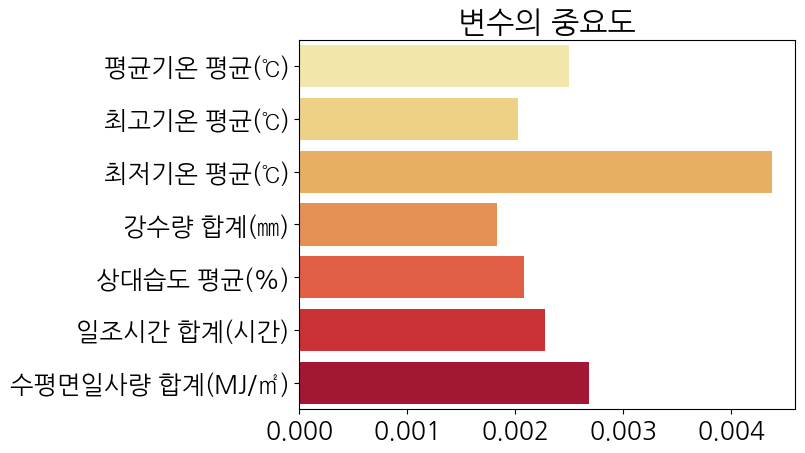

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
importances = best_model_xgb.named_steps['model'].feature_importances_

# OneHotEncoder로 생성된 특성 이름 가져오기
ohe_feature_names = best_model_xgb.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# 숫자형 특성 중요도
numeric_feature_importances = importances[:len(numeric_features)]

# OneHotEncoder 특성 중요도 (길이 조정)
ohe_feature_importances = importances[len(numeric_features):len(numeric_features) + len(ohe_feature_names)]

# '지역'과 '계절'과 관련된 특성 이름 제외
excluded_ohe_features = [('지역_' in name or '계절_' in name) for name in ohe_feature_names]
ohe_feature_importances = ohe_feature_importances[~np.array(excluded_ohe_features)]
ohe_feature_names = ohe_feature_names[~np.array(excluded_ohe_features)]

# 모든 특성 이름과 중요도를 결합 (지역 및 계절 제외)
all_feature_names = numeric_features + list(ohe_feature_names)
all_importances = np.concatenate([numeric_feature_importances, ohe_feature_importances])

# 특성 중요도 시각화
sns.barplot(x=all_importances, y=all_feature_names, palette="YlOrRd")
plt.title('변수의 중요도')
plt.show()


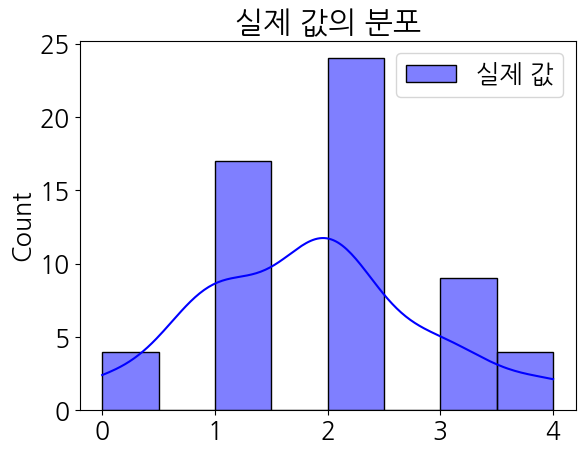

In [ ]:
sns.histplot(y_test_encoded, color="blue", label="실제 값", kde=True)
plt.title('실제 값의 분포')
plt.legend()
plt.show()


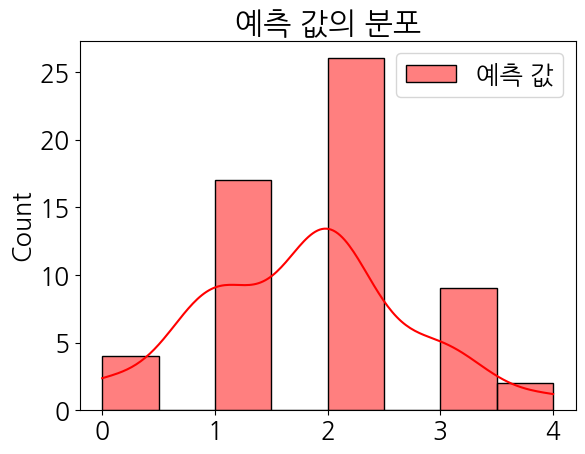

In [ ]:
sns.histplot(y_pred_best_xgb, color="red", label="예측 값", kde=True)
plt.title('예측 값의 분포')
plt.legend()
plt.show()

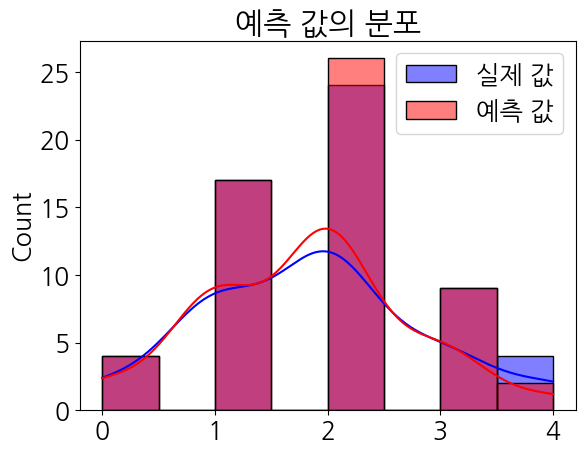

In [ ]:
sns.histplot(y_test_encoded, color="blue", label="실제 값", kde=True)
sns.histplot(y_pred_best_xgb, color="red", label="예측 값", kde=True)
plt.title('예측 값의 분포')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# selected_data에서 타겟 열을 추출하고 라벨 인코딩을 수행합니다.
y = selected_data['가로수 선정(종)']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터를 학습용과 테스트용으로 분할합니다.
X = selected_data.drop(columns=['가로수 선정(종)'])
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 업데이트된 numeric_features 리스트
numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']
categorical_features = ['계절', '지역']
# ColumnTransformer를 업데이트하여 특성별로 변환을 적용 (원-핫 인코딩 및 정규화)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

from sklearn.neural_network import MLPClassifier

# 업데이트된 파이프라인 정의
mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(random_state=42))  # MLPClassifier에 대한 기본 매개변수 설정
])

# 파이프라인을 사용하여 모델 훈련 (인코딩된 타겟 변수 사용)
mlp_pipeline.fit(X_train, y_train_encoded)

# 모델 예측 (인코딩된 타겟 변수에 대한 예측)
y_pred_mlp_encoded = mlp_pipeline.predict(X_test)

# 모델 평가 (인코딩된 타겟 변수 사용)
accuracy_mlp = accuracy_score(y_pred_mlp_encoded, y_test_encoded)
print(f"Encoded Accuracy (MLP): {accuracy_mlp}")

# 원래 라벨로 다시 변환하여 평가 결과를 출력 (옵션)
y_pred_mlp = label_encoder.inverse_transform(y_pred_mlp_encoded)
y_test_original = label_encoder.inverse_transform(y_test_encoded)
print(f"Original Accuracy (MLP): {accuracy_score(y_pred_mlp, y_test_original)}")

Encoded Accuracy (MLP): 0.9137931034482759
Original Accuracy (MLP): 0.9137931034482759


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 튜닝전 정확도 및 점수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_pred_mlp, y_test_original)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_pred_mlp, y_test_original, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_pred_mlp, y_test_original, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_pred_mlp, y_test_original, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 0.9137931034482759
Precision: 0.9588122605363986
Recall: 0.9137931034482759
F1-Score: 0.9269826082677703


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# 탐색할 하이퍼파라미터 조합 설정 (Pipeline 내의 MLPClassifier에 접근하기 위한 이름 수정)
param_dist = {
    'model__hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'model__alpha': [0.0001, 0.0005, 0.001, 0.005],
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    mlp_pipeline,
    param_dist,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=0,
)

# 훈련 데이터에 RandomizedSearch 수행
random_search.fit(X_train, y_train_encoded)

# 최적의 하이퍼파라미터 조합 출력
print("Best Parameters: ", random_search.best_params_)

# 최적의 모델 사용
best_model = random_search.best_estimator_

# 테스트 데이터로 최적의 모델 평가
y_pred_mlp_tuned = best_model.predict(X_test)

# 모델 평가 (인코딩된 타겟 변수 사용)
accuracy_mlp_tuned = accuracy_score(y_pred_mlp_tuned, y_test_encoded)
print(f"Encoded Accuracy (MLP Tuned): {accuracy_mlp_tuned}")

# 원래 라벨로 다시 변환하여 평가 결과를 출력 (옵션)
y_pred_mlp_tuned = label_encoder.inverse_transform(y_pred_mlp_tuned)
y_test_original = label_encoder.inverse_transform(y_test_encoded)
print(f"Original Accuracy (MLP Tuned): {accuracy_score(y_pred_mlp_tuned, y_test_original)}")


In [ ]:
# 튜닝전 정확도 및 점수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 정확도 계산
accuracy = accuracy_score(y_pred_mlp_tuned, y_test_original)
print(f"Accuracy: {accuracy}")

# 정밀도 계산
precision = precision_score(y_pred_mlp_tuned, y_test_original, average='weighted', zero_division=1)
print(f"Precision: {precision}")

# 재현율 계산
recall = recall_score(y_pred_mlp_tuned, y_test_original, average='weighted')
print(f"Recall: {recall}")

# F1-Score 계산
f1 = f1_score(y_pred_mlp_tuned, y_test_original, average='weighted')
print(f"F1-Score: {f1}")

Accuracy: 0.9310344827586207
Precision: 0.9545019157088123
Recall: 0.9310344827586207
F1-Score: 0.9358677157865798


In [ ]:
import pickle

# 최적의 모델을 파일로 저장
with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [72]:
# # 파일에서 모델 불러오기
# with open('best_random_forest_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['평균기온 평균(℃)', '최고기온 평균(℃)',
                                                   '최저기온 평균(℃)', '강수량 합계(㎜)',
                                                   '상대습도 평균(%)', '일조시간 합계(시간)',
                                                   '수평면일사량 합계(MJ/㎡)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['계절', '지역'])])),
                ('model',
                 RandomForestClassifier(min_samples_split=10, n_estimators=200,
                                        random_state=42))])

In [ ]:
# import joblib

# # 특성 열 리스트 생성 (예시)
# feature_columns = ['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Sex_nan']

# # 특성 열 정보를 joblib로 저장
# joblib.dump(feature_columns, 'model_columns.pkl')


In [91]:
merged_data

,지역,평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종),계절
0,1.0,1.0,5.4,2.6,37.5,42.5,207.5,276.0,3.0,겨울
1,1.0,2.4,6.9,1.5,56.2,48.7,192.2,324.4,3.0,겨울
2,1.0,7.7,12.4,3.1,58.1,49.2,222.2,459.3,3.0,봄
3,1.0,13.0,17.9,8.2,99.9,51.3,220.5,543.2,3.0,봄
4,1.0,18.8,23.7,14.2,55.4,55.1,242.3,643.5,3.0,봄
...,...,...,...,...,...,...,...,...,...,...
187,16.0,27.5,32.3,23.7,249.1,73.3,165.1,473.9,4.0,여름
188,16.0,22.2,27.1,18.2,147.4,66.7,190.8,456.4,4.0,가을
189,16.0,16.4,21.9,11.7,88.8,61.0,229.1,416.2,4.0,가을
190,16.0,9.9,15.0,5.5,32.8,57.1,190.0,299.2,4.0,가을


In [96]:
merged_data.to_csv('최후의데이터.csv', index=False)

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

# 데이터 로드 및 전처리
# merged_data = ...

# 특성과 타겟 나누기
X = merged_data.drop(columns=['가로수 선정(종)'])
y = merged_data['가로수 선정(종)']

# 학습용과 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ColumnTransformer를 사용하여 특성별로 변환을 적용
numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)','상대습도 평균(%)','일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']
categorical_features = ['계절', '지역']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 모델 훈련 파이프라인 정의
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# 파이프라인을 사용하여 모델 훈련
pipeline.fit(X_train, y_train)

# 모델 예측
y_pred = pipeline.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9655172413793104


In [93]:
import joblib

# 모델 저장
joblib.dump(pipeline, 'rf_model.pkl')

# 특성 열 정보 저장
feature_columns = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)','계절','가로수 선정(종)' ]
joblib.dump(feature_columns, 'model_columns.pkl')

['model_columns.pkl']

In [94]:
from joblib import dump

# preprocessor는 이미 학습된 ColumnTransformer 인스턴스입니다.
dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']